In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import ast

In [2]:
state_id = pd.read_csv('../data/State_codes.csv',delim_whitespace= True, index_col=[0])
state_id

,STUSAB,STATE_NAME,STATENS
STATE,,,
1,AL,Alabama,1779775
2,AK,Alaska,1785533
4,AZ,Arizona,1779777
5,AR,Arkansas,68085
6,CA,California,1779778
8,CO,Colorado,1779779
9,CT,Connecticut,1779780
10,DE,Delaware,1779781
11,DC,District_of_Columbia,1702382


In [3]:
header = ['Tweet ID', 'timestamp', 'week', 'user_id', 'state', 'original text', 'with_emoji_text', 'without_emoji_text','in_reply_to_status_id_str',  'emoji',
          'hashtag', 'media(type, url)', 'user_mentions', 'language']

In [4]:
data_2015_06 = pd.read_csv('../data/output_2015-06.csv', header=None, names=header)
data_2015_11 = pd.read_csv('../data/output_2015-11.csv', header=None, names=header)

In [5]:
data = pd.concat([data_2015_06, data_2015_11])

<h2>The number of Tweet</h2>

In [6]:
data.shape[0]

10525961

<h3> frequency for each language </h3>

In [10]:
total_language_freq = np.around(data['language'].value_counts(normalize = True),decimals=3)
total_language_freq

en     0.908
und    0.035
es     0.016
de     0.004
fr     0.004
in     0.004
pt     0.003
tl     0.003
it     0.003
ht     0.002
et     0.002
da     0.002
ca     0.002
nl     0.001
cy     0.001
ru     0.001
sv     0.001
pl     0.001
ro     0.001
ja     0.001
ar     0.001
no     0.001
tr     0.001
fi     0.000
lt     0.000
cs     0.000
eu     0.000
th     0.000
hi     0.000
hu     0.000
zh     0.000
is     0.000
lv     0.000
sl     0.000
ko     0.000
uk     0.000
vi     0.000
bg     0.000
fa     0.000
sr     0.000
iw     0.000
el     0.000
ur     0.000
ne     0.000
bn     0.000
am     0.000
bo     0.000
ta     0.000
pa     0.000
mr     0.000
hy     0.000
gu     0.000
ka     0.000
lo     0.000
Name: language, dtype: float64

In [15]:
total_language_type = pd.DataFrame(total_language_freq).T.columns
total_language_type

Index(['en', 'und', 'es', 'de', 'fr', 'in', 'pt', 'tl', 'it', 'ht', 'et', 'da',
       'ca', 'nl', 'cy', 'ru', 'sv', 'pl', 'ro', 'ja', 'ar', 'no', 'tr', 'fi',
       'lt', 'cs', 'eu', 'th', 'hi', 'hu', 'zh', 'is', 'lv', 'sl', 'ko', 'uk',
       'vi', 'bg', 'fa', 'sr', 'iw', 'el', 'ur', 'ne', 'bn', 'am', 'bo', 'ta',
       'pa', 'mr', 'hy', 'gu', 'ka', 'lo'],
      dtype='object')

<h2> Language Frequency for each state</h2>

In [85]:
def test(data, header = total_language_type):
    final_df = pd.DataFrame([[np.nan] * len(total_language_type)], columns = total_language_type)
    temp_df = pd.DataFrame(data.value_counts(normalize = True)).T
    final_df.update(temp_df.reset_index())
    final_df['num_of_tweet'] = len(data)
    return final_df

language_freq_per_state = data[['state', 'language']].groupby('state')['language'].apply(test)
language_freq_per_state.index = language_freq_per_state.index.droplevel(level=1)

In [86]:
language_freq_per_state = state_id[['STUSAB', 'STATE_NAME']].merge(language_freq_per_state, how= 'inner', left_index=True, right_index=True )
language_freq_per_state = language_freq_per_state.sort_values('num_of_tweet', ascending=False)
language_freq_per_state

,STUSAB,STATE_NAME,en,und,es,de,fr,in,pt,tl,...,am,bo,ta,pa,mr,hy,gu,ka,lo,num_of_tweet
6,CA,California,0.884370,0.040871,0.020178,0.002859,0.003622,0.004759,0.002889,0.004622,...,NaN,0.000002,NaN,5.780634e-07,NaN,NaN,NaN,NaN,NaN,1729914
36,NY,New_York,0.902642,0.029567,0.022480,0.002886,0.004509,0.003210,0.004805,0.002388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017187
48,TX,Texas,0.914735,0.040599,0.017079,0.002284,0.002241,0.003151,0.001906,0.002715,...,NaN,NaN,NaN,1.130636e-06,NaN,NaN,NaN,NaN,NaN,884458
12,FL,Florida,0.864303,0.030772,0.044727,0.003104,0.009049,0.003700,0.010158,0.003029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,876713
17,IL,Illinois,0.915374,0.030702,0.014192,0.003237,0.004974,0.002366,0.004781,0.002501,...,NaN,NaN,NaN,2.608276e-06,NaN,0.000003,NaN,NaN,NaN,383395
42,PA,Pennsylvania,0.912784,0.040953,0.007858,0.004493,0.002371,0.003657,0.001578,0.002920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377065
13,GA,Georgia,0.909239,0.040707,0.007441,0.001852,0.001950,0.005168,0.003411,0.002970,...,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,367680
39,OH,Ohio,0.935557,0.033188,0.003789,0.001964,0.001996,0.003373,0.001167,0.002427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,NaN,322221
37,NC,North_Carolina,0.903554,0.028260,0.004537,0.041152,0.002420,0.002359,0.000865,0.001739,...,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,NaN,NaN,298404
34,NJ,New_Jersey,0.907614,0.037667,0.021176,0.001960,0.002320,0.003838,0.002982,0.002306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294396


In [70]:
state_tweet_count = data.groupby('state').size().to_frame().rename(columns = {0:'num of Tweets'})

In [71]:
state_tweet_count = state_id[['STUSAB', 'STATE_NAME']].merge(state_tweet_count, how= 'inner', left_index=True, right_index=True )
state_tweet_count.sort_values('num of Tweets', ascending=False)

,STUSAB,STATE_NAME,num of Tweets
6,CA,California,1729914
36,NY,New_York,1017187
48,TX,Texas,884458
12,FL,Florida,876713
17,IL,Illinois,383395
42,PA,Pennsylvania,377065
13,GA,Georgia,367680
39,OH,Ohio,322221
37,NC,North_Carolina,298404
34,NJ,New_Jersey,294396


<h2>The length of tweet</h2>

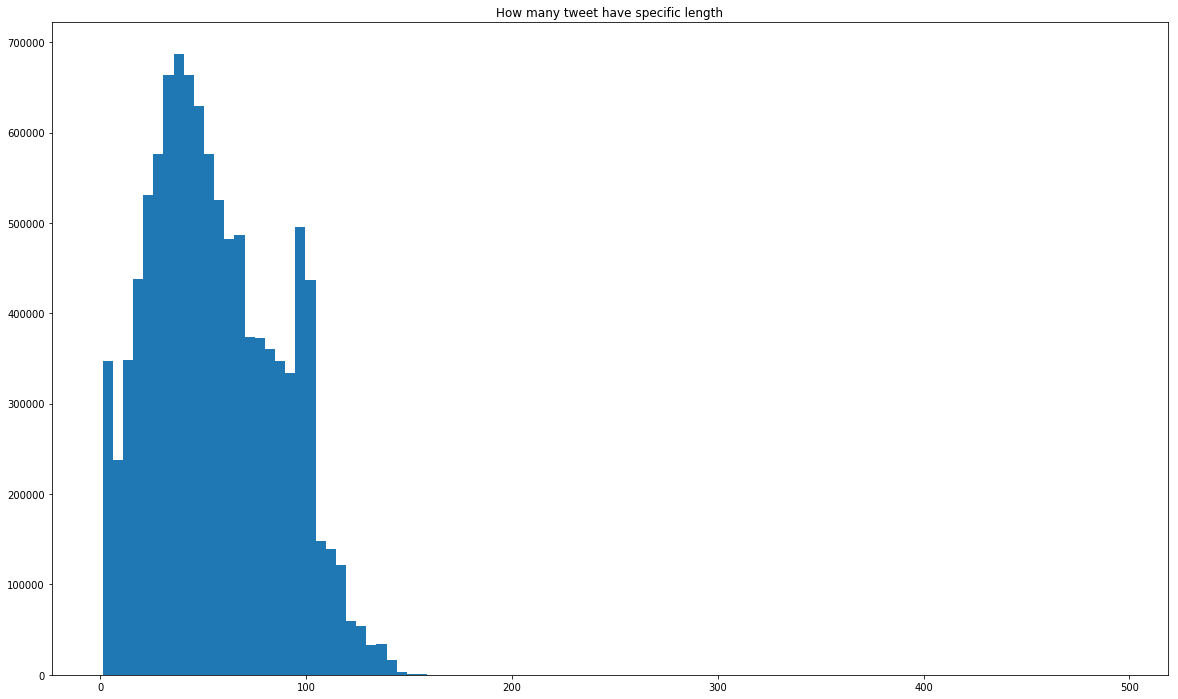

In [89]:
sentence_length = data['without_emoji_text'].astype(str).apply(len)
sentence_lenght = sentence_length.values
plt.figure(figsize = (20,12))
plt.hist(sentence_lenght, bins=100)
plt.title('How many tweet have specific length')
plt.show()

In [102]:
np.average(sentence_lenght),np.std(sentence_lenght)

(55.64215628387755, 30.894286315701663)

<h2> The average tweet length is 55.6 </h2>

In [147]:
count, bins = np.histogram(sentence_lenght, bins= [i*20 for i in range(11)])
range_index = []
for i in range(len(bins) - 1):
    range_index.append(str(bins[i]) + '~' + str(bins[i+1]))
    
cum_count = []
for i in count:
    if len(cum_count) == 0:
        cum_count.append(i)
    else:
        cum_count.append(cum_count[-1] + i)

tweet_cum_density = pd.DataFrame(count, index=range_index)
tweet_cum_density.columns = ['num_tweet']
tweet_cum_density['frequency'] = np.round(tweet_cum_density['num_tweet']/cum_count[-1], decimals=3)
cum_density = cum_count/cum_count[-1]
tweet_cum_density['cum_frequency'] = cum_density
tweet_cum_density.index.name = 'Tweet length range'
tweet_cum_density

,num_tweet,frequency,cum_frequency
Tweet length range,,,
0~20,1276434,0.121,0.121265
20~40,2417900,0.230,0.350974
40~60,2428941,0.231,0.581731
60~80,1816481,0.173,0.754303
80~100,1538238,0.146,0.900440
100~120,847201,0.080,0.980927
120~140,180191,0.017,0.998046
140~160,20546,0.002,0.999998
160~180,19,0.000,1.000000


<h2> Average Tweet Length per state</h2>

In [111]:
def test(s):
    sentence_lenght = s.astype(str).apply(len)
    return pd.DataFrame([[np.mean(sentence_lenght), np.std(sentence_lenght), len(s)]], columns=['avg length', 'std', 'total tweet'])

tweet_length_state = data[['state','without_emoji_text']].groupby('state')['without_emoji_text'].apply(test)
tweet_length_state.index = tweet_length_state.index.droplevel(level=1)


In [115]:
tweet_length_state = state_id[['STUSAB', 'STATE_NAME']].merge(tweet_length_state, how= 'inner', left_index=True, right_index=True )
tweet_length_state.sort_values('avg length',ascending=False)

,STUSAB,STATE_NAME,avg length,std,total tweet
2,AK,Alaska,103.395683,51.560905,139
15,HI,Hawaii,83.000000,6.000000,2
41,OR,Oregon,69.934461,28.875237,193106
30,MT,Montana,64.575677,30.057079,12778
56,WY,Wyoming,63.924722,30.531283,8369
8,CO,Colorado,63.072566,32.597017,134127
21,KY,Kentucky,60.828333,31.865209,102728
46,SD,South_Dakota,60.315545,30.672753,11393
49,UT,Utah,60.211509,31.464775,51558
50,VT,Vermont,60.022684,30.054420,12652


<h2>Emoji</h2>

In [6]:
num_emojis = data['emoji'].dropna().apply(len)

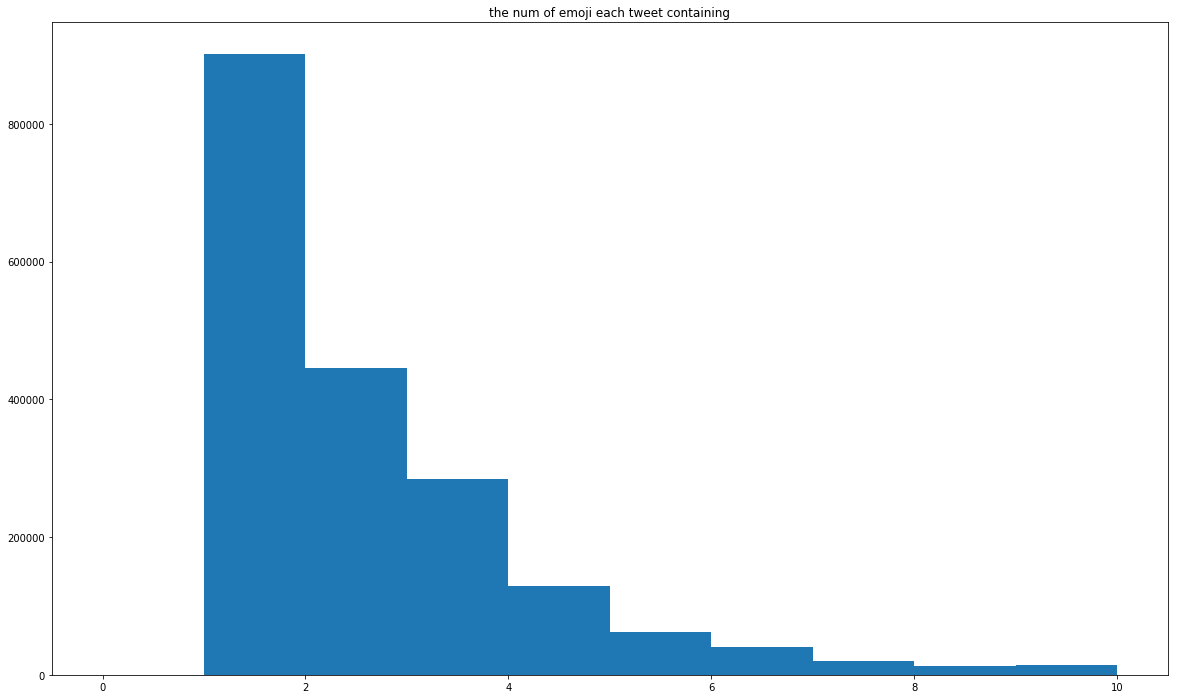

In [7]:
plt.figure(figsize = (20,12))
plt.hist(num_emojis, bins=10,range=(0,10))
plt.title('the num of emoji each tweet containing')
plt.show()

In [10]:
count, bins = np.histogram(num_emojis, bins= [0,2,4,6,10,20])
range_index = []
for i in range(len(bins) - 1):
    range_index.append(str(bins[i]) + '~' + str(bins[i+1]))
    
cum_count = []
for i in count:
    if len(cum_count) == 0:
        cum_count.append(i)
    else:
        cum_count.append(cum_count[-1] + i)

tweet_cum_density = pd.DataFrame(count, index=range_index)
tweet_cum_density.columns = ['num_tweet']
tweet_cum_density['frequency'] = np.round(tweet_cum_density['num_tweet']/cum_count[-1], decimals=3)
cum_density = cum_count/cum_count[-1]
tweet_cum_density['cum_frequency'] = cum_density
tweet_cum_density.index.name = 'num_emoji'
tweet_cum_density

,num_tweet,frequency,cum_frequency
num_emoji,,,
0~2,902235,0.468,0.467651
2~4,730219,0.378,0.846141
4~6,190906,0.099,0.945093
6~10,82427,0.043,0.987817
10~20,23505,0.012,1.000000


In [119]:
(data.shape[0] - len(num_emojis))/data.shape[0]

0.8161660488766774

<h2> 81% tweet having emoji</h2>

In [120]:
np.mean(num_emojis), np.std(num_emojis)

(2.3486950324775493, 2.8426967862295673)

<h2>For the tweet having emojis, the average num of emojis it contains are 2.34</h2>

<h2> Hashtag </h2>

In [126]:
num_tweet_contain_hashtag = 0
num_hashtag_each_tweet = []
each_hashtag_mention_time = Counter()
for value in data['hashtag'].dropna():
    num_tweet_contain_hashtag += 1
    try:
        value_list = ast.literal_eval(value)
        if not isinstance(value_list, list):
            value_list = [str(value_list).lower()]
        value_list = [item.lower() for item in value_list]
        num_hashtag_each_tweet.append(len(value_list))
        each_hashtag_mention_time.update(Counter(value_list))
    except ValueError:
        value_str = value.lower()
        each_hashtag_mention_time.update({value_str:1})
        num_hashtag_each_tweet.append(1)
    except SyntaxError:
        value_str = value.lower()
        each_hashtag_mention_time.update({value_str:1})
        num_hashtag_each_tweet.append(1)

<h3> Most frequently mentioned hastag </h3>

In [127]:
each_hashtag_mention_time = sorted(list(each_hashtag_mention_time.items()), key= lambda a: a[1], reverse=True)
each_hashtag_mention_time[:100]

[('pdx911', 79492),
 ('photo', 76897),
 ('realestate', 66984),
 ('traffic', 53987),
 ('nyc', 51797),
 ('orlpol', 45776),
 ('us_test', 36028),
 ('orlando', 35924),
 ('repost', 34648),
 ('listing', 29260),
 ('tbt', 29143),
 ('love', 27243),
 ('carolinawx', 24907),
 ('opd', 21999),
 ('jobs', 19587),
 ('realtor', 19556),
 ('newyork', 18279),
 ('chicago', 17682),
 ('thanksgiving', 17611),
 ('ocso', 17583),
 ('art', 16639),
 ('family', 16527),
 ('nofilter', 16172),
 ('california', 15409),
 ('menu', 14662),
 ('summer', 14224),
 ('miami', 14114),
 ('claytonnc_wx', 14014),
 ('sunset', 13844),
 ('job', 13780),
 ('losangeles', 13066),
 ('foodporn', 12335),
 ('la', 12271),
 ('music', 11903),
 ('vscocam', 11887),
 ('beermenus', 11698),
 ('travel', 11615),
 ('weather', 11543),
 ('selfie', 11537),
 ('usa', 11209),
 ('claytonnc', 11128),
 ('endomondo', 10861),
 ('earthquake', 10725),
 ('latergram', 10590),
 ('food', 10489),
 ('fl', 10472),
 ('fitness', 9806),
 ('lasvegas', 9754),
 ('trndnl', 9638),
 (

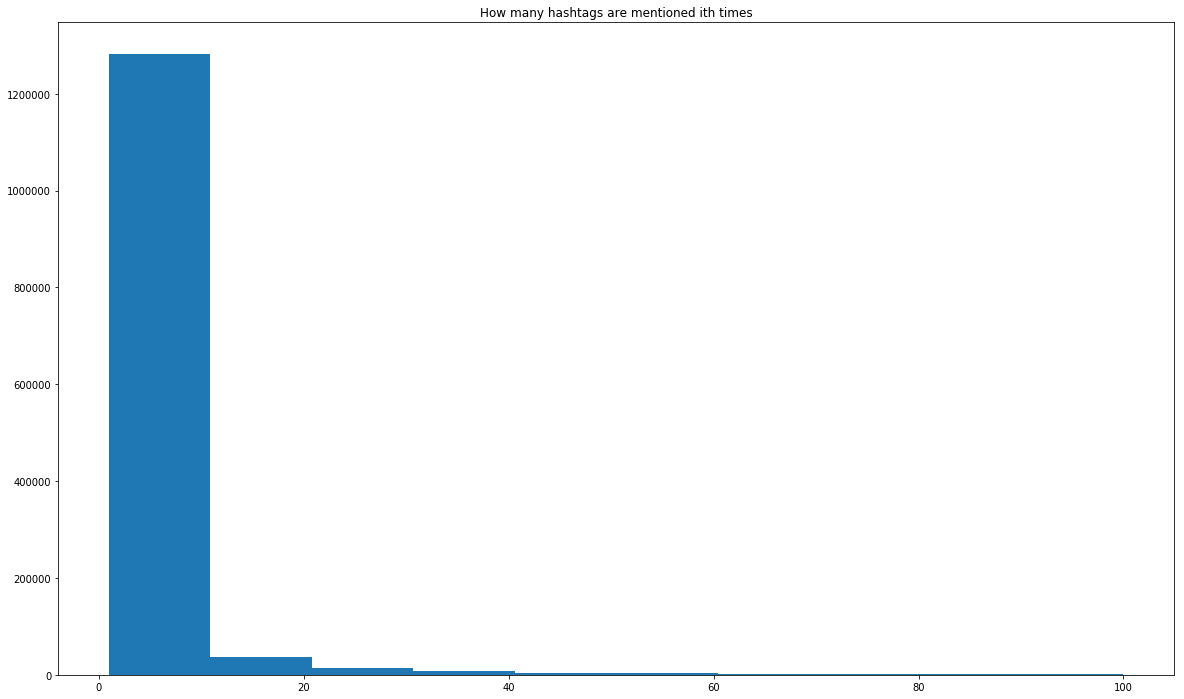

In [141]:
mention_time = list(dict(each_hashtag_mention_time).values())
plt.figure(figsize = (20,12))
plt.hist(mention_time, bins=10, range=(1,100))
plt.title('How many hashtags are mentioned ith times')
plt.show()

In [152]:
mention_time = list(dict(each_hashtag_mention_time).values())
count, bins = np.histogram(mention_time, bins= [0,50,100,100000])

In [153]:
range_index = []
for i in range(len(bins) - 1):
    range_index.append(str(bins[i]) + '~' + str(bins[i+1]))
    
cum_count = []
for i in count:
    if len(cum_count) == 0:
        cum_count.append(i)
    else:
        cum_count.append(cum_count[-1] + i)

tweet_cum_density = pd.DataFrame(count, index=range_index)
tweet_cum_density.columns = ['num_hashtag']
tweet_cum_density['frequency'] = np.round(tweet_cum_density['num_hashtag']/cum_count[-1], decimals=3)
cum_density = cum_count/cum_count[-1]
tweet_cum_density['cum_frequency'] = cum_density
tweet_cum_density.index.name = 'mention times'
tweet_cum_density

,num_hashtag,frequency,cum_frequency
mention times,,,
0~50,1344545,0.987,0.986824
50~100,9100,0.007,0.993503
100~100000,8852,0.006,1.000000


In [131]:
print('The num of different hashtag: ' , len(each_hashtag_mention_time))

The num of different hashtag:  1362497


In [125]:
num_tweet_contain_hashtag/data.shape[0]

0.33965383303244234

<h3> 33.9% tweet has hashtag </h3>

In [154]:
np.mean(num_hashtag_each_tweet)

2.5494169109665155

For the tweets containing hashtag, the average num of mentioned hashtag is 2.5